### load packages

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('bmh')

### load and inspect data

In [2]:
data = pd.read_csv('xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


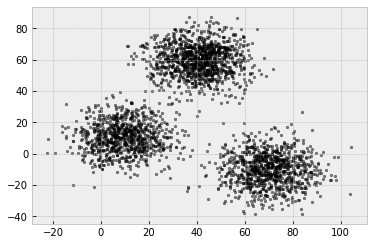

In [3]:
X = data.values
plt.scatter(X[:,0], X[:,1], c='black', s=7, alpha=0.5)

### codes for algorithm

In [4]:
class k_means:
    
    # initialize objects
    def __init__(self, k = 3, tol = 0.001, max_iter = 500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    # function for initializing centroids. randomly select k points from training data
    def __get_centroids(self, X):
        idx = np.random.randint(len(X), size = self.k)
        return X[idx,:]
    
    # function for calculating euclidean distance
    def __dist(self, point_a, point_b, ax = 1):
        return np.linalg.norm(point_a - point_b, axis = ax)
        
    # main fucntion for training
    def fit(self, X):
        
        # initialize centroids
        self.centroids = self.__get_centroids(X)
        
        # initialize array for cluster labels
        clusters = np.zeros(len(X))
        
        # initialize array for storing preivous centroids, for comparison purpose
        centroids_prev = np.zeros(self.centroids.shape)
        
        # initialize distance between previous & current centroids
        error = self.__dist(self.centroids, centroids_prev, None)
        
        # initialize iteration counter
        cnt = 0
        
        while error >= self.tol or cnt <= self.max_iter:
            
            # for each iteration, calculate distance between each training sample and each centroid
            # then assign to each sample the label correpsonding to the shortest distance
            for i in range(len(X)):
                distance = self.__dist(X[i], self.centroids)
                cluster = np.argmin(distance)
                clusters[i] = cluster
            
            # update iteration counter & centroid history
            cnt += 1
            centroids_prev = deepcopy(self.centroids)
            
            # update centroids
            for c in range(self.k):
                self.centroids[c,:] = X[clusters == c, :].mean(axis = 0)
            
            # update distance between previous & current centroids
            error = self.__dist(self.centroids, centroids_prev, None)
            
    # function for prediction
    def predict(self, X):        
        labels = np.zeros(len(X))
        for i in range(len(X)):
            distance = self.__dist(X[i], self.centroids)
            labels[i] = np.argmin(distance)
        return labels

In [5]:
test = k_means()
test.fit(X)

### evaluation

In [6]:
test.centroids

array([[ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ],
       [ 69.92418447, -10.11964119]])

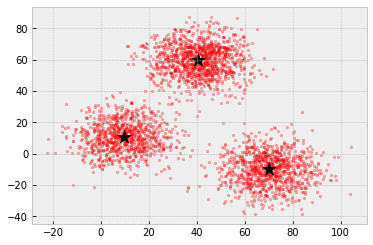

In [7]:
plt.scatter(data.V1.values, data.V2.values, c='red', s=7, alpha=0.3)
plt.scatter(test.centroids[:,0], test.centroids[:,1], marker = '*', c = 'black', s = 200)